# Analysis of English Premier League

### Content

 1. Introduction: English Premier League
 2. Data description
 3. Research questions
 4. Data preparation: cleaning and shaping
 5. Data visualisation
 6. Conclusion

## 1. Introduction: English Premier League

The Premier League, often referred to as the English Premier League or the EPL outside England, is the top level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL). Seasons run from August to May with each team playing 38 matches (playing all 19 other teams both home and away). Most games are played on Saturday and Sunday afternoons.

The competition was founded as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League, founded in 1888, and take advantage of a lucrative television rights deal.

The Premier League is the most-watched sports league in the world, broadcast in 212 territories to 643 million homes and a potential TV audience of 4.7 billion people. For the 2018–19 season average Premier League match attendance was at 38,181,second to the Bundesliga's 43,500, while aggregated attendance across all matches is the highest of any league at 14,508,981. Most stadium occupancies are near capacity. The Premier League ranks second in the UEFA coefficients of leagues based on performances in European competitions over the past five seasons as of 2019, only behind Spain's La Liga.

Source(https://en.wikipedia.org/wiki/Premier_League)

## 2. Data description 

According to the intro information about English Premier League (EPL), it is clear that EPL is the one of the most followed football league in the world. There are popular clubs like Manchester United, Manchester City, Liverpool and etc. It is interesting to discover and compare different features of matches.

Unfortunately, the season 2019-2020 was not passed as usual due to the coronavirus pandemic. Therefore, I decided to take last two seasons to see complete picture. So, analysis will be based on data of 2018-2019 and 2019-2020 season. The dataset taken from https://sports-statistics.com/sports-data/soccer-datasets/. Below the data that will be used in analysis:

* **Date =** Match Date (dd/mm/yy)
* **HomeTeam =** Home Team
* **AwayTeam =** Away Team
* **FTHG =** Full Time Home Team Goals
* **FTAG =** Full Time Away Team Goals
* **FTR =** Full Time Result (H=Home Team Win, D=Draw, A=Away Team Win)
* **Referee =** Name of the person who judges the match
* **HS =** Home Team Shots
* **AS =** Away Team Shots
* **HST =** Home Team Shots on Target
* **AST =** Away Team Shots on Target
* **HY =** Home Team Yellow Cards
* **AY =** Away Team Yellow Cards
* **HR =** Home Team Red Cards
* **AR =** Away Team Red Cards
* **B365H =** the coefficient for the home team's victory provided by the bookmaker "Bet365" 
* **B365D =** the coefficient for the draw provided by the bookmaker "Bet365"
* **B365A =** the coefficient for the away team's victory provided by the bookmaker "Bet365"

## 3. Research questions

In this project, mainly I will focus on several parts of data analysis and visualization:
1. Analyze performance of clubs over seasons
2. Analyze red and yellow cards ratio by referee
3. Analyze the number of goals per match by teams 
4. Analyze the percentage of shots became a goal by teams
5. Analyze the mean betting odds by match outcome

## 4. Data preparation: cleaning and shaping

At this part, I have almost ready dataset but I should make some operations with them:
 * specify a list of columns which are needed.
 * concatenate two data frames
 * check for the inconsistencies
 * add columns

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
#import datasets and specifying a list of columns
columns = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']
df1 = pd.read_csv("england-premier-league-2018-to-2019.csv", usecols = columns)
df2 = pd.read_csv("england-premier-league-2019-to-2020.csv", usecols = columns)

In [4]:
df1.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,HST,AST,HY,AY,HR,AR,B365H,B365D,B365A
0,10/08/2018,Man United,Leicester,2,1,H,A Marriner,8,13,6,4,2,1,0,0,1.57,3.9,7.50
1,11/08/2018,Bournemouth,Cardiff,2,0,H,K Friend,12,10,4,1,1,1,0,0,1.90,3.6,4.50
2,11/08/2018,Fulham,Crystal Palace,0,2,A,M Dean,15,10,6,9,1,2,0,0,2.50,3.4,3.00
3,11/08/2018,Huddersfield,Chelsea,0,3,A,C Kavanagh,6,13,1,4,2,1,0,0,6.50,4.0,1.61
4,11/08/2018,Newcastle,Tottenham,1,2,A,M Atkinson,15,15,2,5,2,2,0,0,3.90,3.5,2.04


In [23]:
df2.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,HST,AST,HY,AY,HR,AR,B365H,B365D,B365A
0,09/08/2019,Liverpool,Norwich,4,1,H,M Oliver,15,12,7,5,0,2,0,0,1.14,10.00,19.00
1,10/08/2019,West Ham,Man City,0,5,A,M Dean,5,14,3,9,2,2,0,0,12.00,6.50,1.22
2,10/08/2019,Bournemouth,Sheffield United,1,1,D,K Friend,13,8,3,3,2,1,0,0,1.95,3.60,3.60
3,10/08/2019,Burnley,Southampton,3,0,H,G Scott,10,11,4,3,0,0,0,0,2.62,3.20,2.75
4,10/08/2019,Crystal Palace,Everton,0,0,D,J Moss,6,10,2,3,2,1,0,1,3.00,3.25,2.37


I specified a list of columns that will be need further at stage of reading files.

Below I concatenated two data frames in order to analyze matches of last 2 seasons.

In [3]:
#Concatenate data frames
frames = [df1, df2]
df = pd.concat(frames, axis = 0, join = 'outer', ignore_index = True)
df.tail(3)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,HST,AST,HY,AY,HR,AR,B365H,B365D,B365A
585,01/01/2020,Norwich,Crystal Palace,1,1,D,J Moss,15,12,4,3,5,0,0,0,2.50,3.40,2.75
586,01/01/2020,West Ham,Bournemouth,4,0,H,G Scott,14,3,7,2,1,2,0,0,1.90,3.75,3.80
587,01/01/2020,Arsenal,Man United,2,0,H,C Kavanagh,10,10,4,4,2,0,0,0,2.55,3.60,2.62


In [8]:
#Checking for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      588 non-null    object 
 1   HomeTeam  588 non-null    object 
 2   AwayTeam  588 non-null    object 
 3   FTHG      588 non-null    int64  
 4   FTAG      588 non-null    int64  
 5   FTR       588 non-null    object 
 6   Referee   588 non-null    object 
 7   HS        588 non-null    int64  
 8   AS        588 non-null    int64  
 9   HST       588 non-null    int64  
 10  AST       588 non-null    int64  
 11  HY        588 non-null    int64  
 12  AY        588 non-null    int64  
 13  HR        588 non-null    int64  
 14  AR        588 non-null    int64  
 15  B365H     588 non-null    float64
 16  B365D     588 non-null    float64
 17  B365A     588 non-null    float64
dtypes: float64(3), int64(10), object(5)
memory usage: 82.8+ KB
None


* object(5): date, Home team, Away team, FTR, Referee
* float(3): B365H, B365A, B365D
* int(10): FTHG, FTAG, HS, AS, HST, AST, HY, AY, HR, AR

In [9]:
df.isnull().any()

Date        False
HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
Referee     False
HS          False
AS          False
HST         False
AST         False
HY          False
AY          False
HR          False
AR          False
B365H       False
B365D       False
B365A       False
dtype: bool

As it can be seen from the results above, data frame consists of 588 observations and 18 columns. Also there is no null values in any of this columns and type of the columns are proper.

In [28]:
#checking for duplicates 
print(df.duplicated())
print(df.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
583    False
584    False
585    False
586    False
587    False
Length: 588, dtype: bool
0


From the results above, I can conclude that there is no any inconsistencies related with data frame.

In [4]:
#add columns since it will be useful later

#total yellow card in match
df['TY'] = df['HY'] + df['AY']

#total red card in match
df['TR'] = df['HR'] + df['AR']

#total goals scored in match
df['TG'] = df['FTHG'] + df['FTAG']

#percent of shots became a goal of home team
df['SGRH'] = (df['FTHG'] / df['HS']) * 100

#percent of shots became a goal of away team
df['SGRA'] = (df['FTAG'] / df['AS']) * 100

#changing the format of date of match
df['game_date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

#Season of the match
df['Season'] = ((df['game_date']>'2018-08-09') & (df['game_date']<'2019-08-01'))
df.loc[df.Season == True, 'Season'] = '2018/19'
df.loc[df.Season == False, 'Season'] = '2019/20'

#How many times team won at home and away in the season
df = df.merge(pd.get_dummies(df['FTR']), right_index=True, left_index=True)

#Wins at home
df['home_win_in_season'] = df.groupby(['Season','HomeTeam'])['H'].transform('sum')

#Wins away
df['away_win_in_season'] = df.groupby(['Season','AwayTeam'])['A'].transform('sum')


df.head(2)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,HST,...,TG,SGRH,SGRA,game_date,Season,A,D,H,home_win_in_season,away_win_in_season
0,10/08/2018,Man United,Leicester,2,1,H,A Marriner,8,13,6,...,3,25.000000,7.692308,2018-08-10,2018/19,0,0,1,10,7
1,11/08/2018,Bournemouth,Cardiff,2,0,H,K Friend,12,10,4,...,2,16.666667,0.000000,2018-08-11,2018/19,0,0,1,8,4


I added some columns which may give me more insights in data visualization part.

## 5. Data visualisation

At this part, I will answer on my research questions via data visualisation techniques.

### 5.1 Q1: performance of clubs over seasons
In order to respond question I will:
 * Make some data preparation by creating a dataframe with information about teams' number of wins by seasons 
 * Visualize it by plotting heatmap 


In [31]:
#Data preparation for Q1

#Teams' number of wins at home by seasons
HomeTeam_win = (df.groupby(['Season', 'HomeTeam'])['H'].sum().reset_index().rename(columns={'HomeTeam':'Team','H':'home_win'}))

#Teams' number of wins away by seasons
AwayTeam_win = (df.groupby(['Season', 'AwayTeam'])['A'].sum().reset_index().rename(columns={'AwayTeam':'Team','A':'away_win'}))

#Merging previous 2 dataframes 
win_by_season = AwayTeam_win.merge(HomeTeam_win, on=['Season', 'Team'])

#Adding column total_win to summarize number of wins at home and away
win_by_season['total_win'] = win_by_season['away_win'] + win_by_season['home_win']

#Changing index on Team
win_by_season_pivot = (win_by_season.pivot_table(index='Team',columns='Season', values='total_win').fillna(0))

win_by_season_pivot.tail(3)

Season,2018/19,2019/20
Team,,
Watford,14.0,4.0
West Ham,15.0,6.0
Wolves,16.0,7.0


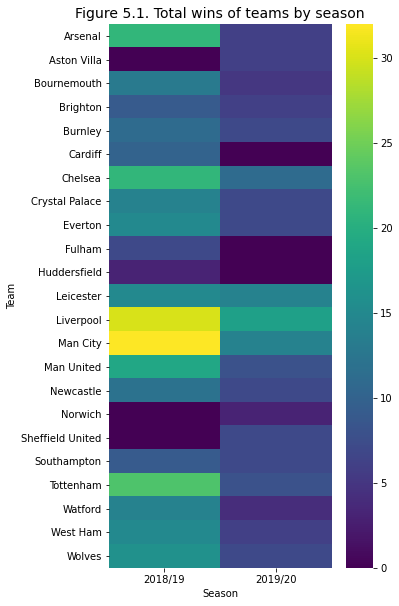

In [37]:
#Visualisation code for Q1

#Plot heatmap
fig, ax = plt.subplots(figsize=(5,10))

sns.heatmap(win_by_season_pivot, cmap='viridis')

#Set plot's characteristics
ax.set_title('Figure 5.1. Total wins of teams by season', fontsize=14)


plt.show()

#### Findings and comments:
As it can be seen from the graph above, 3 clubs in each season has no wins since they was in lower division (EFL Championship). In 2018/19: Aston Villa, Norwich, Sheffield United; In 2019/20: Cardiff, Fulham, Huddersfield. On the other hand, clubs with highest number of wins marked with brighter color and in each season stand out Manchester City and Liverpool.

### 5.2 Q2: red and yellow cards ratio by referee
In order to respond question I will:
 * Create a dataframe with information about given cards by each Referee
 * Visualize it by plotting bar plots

In [21]:
#Data preparation for Q2

#Create a dataframe for analyzing total yellow and red cards by referee
ref_df = df[["TY", "TR", "Referee"]]

#Apply groupby on referee in order to show mean cards per match
ref_grouped = ref_df.groupby("Referee", as_index = False).mean()

ref_grouped.head()

,Referee,TY,TR
0,A Madley,2.625000,0.125000
1,A Marriner,2.625000,0.125000
2,A Taylor,3.632653,0.081633
3,C Kavanagh,3.153846,0.051282
4,C Pawson,3.702703,0.216216


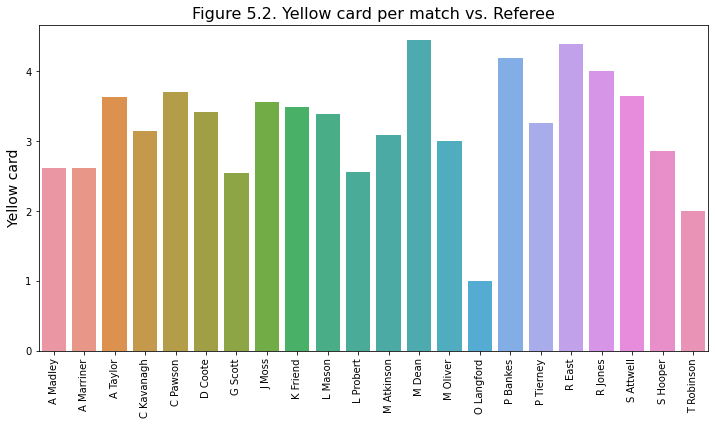

In [29]:
#Visualisation code for Q2
fig, ax = plt.subplots(figsize=(12,6))

#Plot barplot
ax = sns.barplot( x="Referee",y= "TY", data = ref_grouped, ax=ax)

#Set plot's characteristics
ax.axes.set_title("Figure 5.2. Yellow card per match vs. Referee",fontsize=16)
ax.set_ylabel("Yellow card",fontsize=14)
ax.set_xlabel("")

plt.xticks(rotation=90)
plt.show()

#### Findings and comments:
From **Figure 5.2.**, it is clear that one of the most strict referees are M Dean and R East with an average 4.44 and 4.4 yellow cards per game, respectively. However, O Langford is more liberal referee with an average 1 yellow cards per game. In addition, most of the referees showed in average 2 or more yellow cards per match.

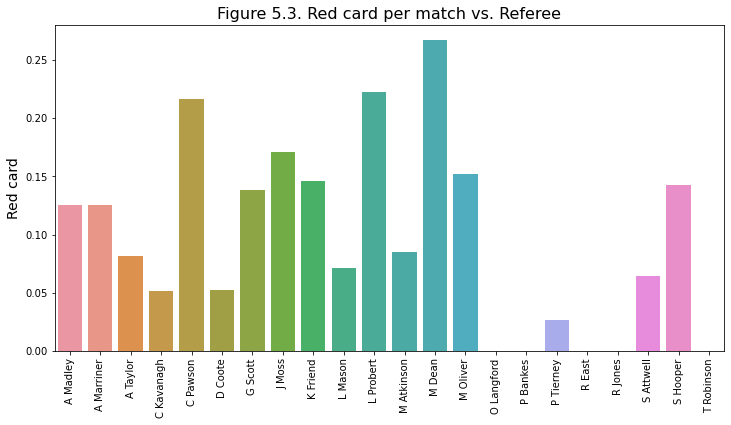

In [28]:
#Visualisation code for Q2
fig, ax = plt.subplots(figsize=(12,6))

#Plot barplot
ax = sns.barplot(x="Referee",y= "TR",data = ref_grouped, ax=ax)

#Set plot's characteristics
ax.axes.set_title("Figure 5.3. Red card per match vs. Referee",fontsize=16)
ax.set_ylabel("Red card",fontsize=14)
ax.set_xlabel("")

plt.xticks(rotation=90)
plt.show()

#### Findings and comments:
From **Figure 5.3.**, it is clear that most strict referee is M Dean with an average 0.26 red cards per game. However, there are more liberal referees like T Robinson, R Jones, R East, P Bankes, O Langford with an average 0 red cards per game in season 2018/19 and 2019/20.

### 5.3 Q3: the number of goals per match by teams
In order to respond question I will:
 * Create a dataframe with information about teams' scored goal by away and at home
 * Visualize it by plotting scatter plot

In [22]:
#Data preparation for Q3

#Create a dataframe for analyzing home team goals
goalH = df[["HomeTeam","FTHG"]]

#Apply groupby on HomeTeam in order to show mean goal at home per match
goalH_grouped = goalH.groupby(["HomeTeam"], as_index = False).mean().rename(columns={"HomeTeam": "Team"})

goalH_grouped.head(2)

,Team,FTHG
0,Arsenal,1.966667
1,Aston Villa,1.300000


In [13]:
#Create a dataframe for analyzing home team goals
goalA= df[["AwayTeam", "FTAG"]]

#Apply groupby on AwayTeam in order to show mean goal away per match
goalA_grouped = goalA.groupby(["AwayTeam"], as_index = False).mean().rename(columns={"AwayTeam": "Team"})

goalA_grouped.head(2)

,Team,FTAG
0,Arsenal,1.448276
1,Aston Villa,1.272727


In [14]:
#Merging 2 previous dataframes on column Team
goal = goalH_grouped.merge(goalA_grouped, on=['Team'])

goal.head(2)

,Team,FTHG,FTAG
0,Arsenal,1.966667,1.448276
1,Aston Villa,1.300000,1.272727


In [27]:
#Visualisation code for Q3

#Plot scatterplot
fig = go.Figure(data=go.Scatter(x=goal["FTAG"],
                                y=goal["FTHG"],
                                mode='markers',
                                marker_color=goal["FTHG"],
                                text="Team: " + goal["Team"]  
                               )) 


# set plot's characteristics
fig.update_layout(
                    title={
                            'text': "Figure 5.4. Goals scored per match by teams",
                            'y':0.9,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top'}, 
                    xaxis_title="Goals scored Away",
                    yaxis_title="Goals scored at Home"    
            )
fig.show()

#### Findings and comments:
From **Figure 5.4.** if we hover on dots we can see that Manchester City and Liverpool are most goalscorer teams both at home and away. On the other hand, I can mention Huddersfield which has lowest scored goal at home and away. Moreover, most of the teams scores more goal at home than away except Leicester and Crystal Palace.

### 5.4 Q4: the percentage of shots became a goal by teams
In order to respond question I will:
 * Create a dataframes with information about teams' percent of shots became a goal by home and away matches
 * Visualize it by plotting stacked barplot

In [23]:
#Data preparation for Q4

#Create a dataframe for analyzing home teams' percent of shots became a goal
HomeG_df = df[["HomeTeam", "SGRH"]]

#Apply groupby on HomeTeam in order to get mean percent of shots became a goal per home match
HomeG_df_grouped = HomeG_df.groupby(["HomeTeam"], as_index = False).mean().rename(columns={"HomeTeam": "Team"})

HomeG_df_grouped.head(2)

,Team,SGRH
0,Arsenal,14.770927
1,Aston Villa,10.673566


In [33]:
#Create a dataframe for analyzing away teams' percent of shoots became a goal
AwayG_df = df[["AwayTeam", "SGRA"]]

#Apply groupby on AwayTeam in order to get mean percent of shots became a goal per away match
AwayG_df_grouped = AwayG_df.groupby(["AwayTeam"], as_index = False).mean().rename(columns={"AwayTeam": "Team"})

AwayG_df_grouped.head(2)

,Team,SGRA
0,Arsenal,13.741190
1,Aston Villa,10.046015


In [34]:
#Visualisation code for Q4

#Plot bar chart 
fig = go.Figure(data=[
    go.Bar(name='At Home', x=HomeG_df_grouped['Team'], y=HomeG_df_grouped['SGRH']),
    go.Bar(name='Away', x=AwayG_df_grouped['Team'], y=AwayG_df_grouped['SGRA'])
])


#set plot's characteristics
fig.update_layout(
                    title={
                            'text': "Figure 5.5. Percent of shots became a goal by teams",
                            'y':0.9,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top'}, 
                    yaxis_title="% of shots became a goal",
                    barmode='stack'          
            )
fig.update_xaxes(tickangle=-90)

fig.show()

#### Findings and comments:
From **Figure 5.5.** it is clear that there are few teams with high percentage of shots that became a goal, which are Liverpool, Sheffield United, Manchester City and Tottenham. Moreover, most of the teams scored 20% or more of shots except Cardiff, Huddersfield and Fulham. Also, Huddersfield and Fulham have lowest percentage among all teams played in EPL within 2 seasons.

### 5.5 Q5: the mean betting odds by match outcome
In order to respond question I will:
 * Create a dataframes with information about mean betting odds by match result
 * Visualize it by plotting barplot

In [24]:
#Data preparation for Q5

#Create a dataframe for analyzing betting odds when home teams won
BetH = df[df["FTR"] == 'H'][["B365H", "FTR"]]
#Apply groupby on Full Time Result when Home team won in order to get mean betting odd
BetH_grouped = BetH.groupby("FTR").mean().rename(columns={'B365H': 'B365'})

#Create a dataframe for analyzing betting odds when was draw
BetD = df[df["FTR"] == 'D'][["B365D", "FTR"]]
#Apply groupby on Full Time Result when was draw in order to get mean betting odd
BetD_grouped = BetD.groupby("FTR").mean().rename(columns={'B365D': 'B365'})

#Create a dataframe for analyzing betting odds when away teams won
BetA = df[df["FTR"] == 'A'][["B365A", "FTR"]]
#Apply groupby on Full Time Result when Away team won in order to get mean betting odd
BetA_grouped = BetA.groupby("FTR").mean().rename(columns={'B365A': 'B365'})

#Concatenate previous 3 dataframes
frame = [BetH_grouped,  BetD_grouped, BetA_grouped]
Bet = pd.concat(frame, axis = 0).reset_index()

Bet

,FTR,B365
0,H,2.205882
1,D,3.907769
2,A,3.123077


In [36]:
#Visualisation code for Q5

#Plot barplot
fig = go.Figure([go.Bar(x=Bet["FTR"], y=Bet["B365"])])

#set plot's characteristics
fig.update_layout(
                    title={
                            'text': "Figure 5.6. Mean betting odd by match outcome",
                            'y':0.9,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top'}, 
                    xaxis_title="Match outcome",
                    yaxis_title="Betting odd",
                    xaxis = dict(
                                    tickmode = 'array',
                                    tickvals = ["H", "D", "A"],
                                    ticktext = ['Home', 'Draw', 'Away']
                                )
            )

fig.show()

#### Findings and comments:
As it can be seen from  **Figure 5.6.**, mean betting odd for matches where were draw is higher than away or home team win's mean betting odd. Also, average odds for matches where home team won is higher than matches where away teams won. 

## 6. Conclusion

Overall, I can make a some conclusion about English Premier League in 2018/19 and 2019/20 seasons.

Firstly, taking into account a coronavirus pandemic in season 2019/20, teams demonstrated similiar performance. Especially, teams like Manchester City and Liverpool showed great performance by standing out with high number of wins in both seasons.

Secondly, most of the referees are not shy about showing cards. Which means most of them are in average show 2 or more yellow cards per match. Also, the strictest referee in EPL on yellow and red card is M Dean.

Thirdly, majority of teams had no problems with scoring goals at home compared to away matches. However, Manchester City and Liverpool showed great performance both on home and away matches by scoring in average nearly 2 or more goals per match.

Fourth, almost all teams scored approximately 1 of 5 shots at home and away matches. Interestengly, percent realization of shots of Sheffield United is same as Manchester City's and Liverpool's. But, from previous investigation and graphs we are already know that Sheffield United did not have same great performance. Therefore, I can conclude that Sheffield United have only great realization of shots.

Finally, usually bookmaker company does not believe in draw and away team's win as match outcome. Therefore, in average bookmaker favourite is home team.